In [66]:
import xarray as xr
from sqlalchemy import create_engine, inspect
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
from natsort import natsorted
import datetime as dt

In [67]:
# Load db
engine = create_engine('sqlite:///exampleco_db.db', echo=False)

In [68]:
# View tables
inspector = inspect(engine)
names = inspector.get_table_names()

<font size = '4'> For our arrays, we will choose to separate each array by sensor, and separate the columns in each array by machine and the rows by timestamp. This allows for straightforward analysis of various statistics such as mean and standard deviation separated by machine. </font>

In [69]:
dfs = {}
#The following code maps data from each sensor to a pandas DataFrame and adds it to a dictionary.
for i in range(0,len(names)-1):
    temp_df = pd.read_sql_table(names[i],con=engine) #Read SQL table into pandas array
    temp_df = temp_df.pivot(index = 'timestamp', columns = 'machine', values = 'value') #Pivot so that separate machines become columns
    dfs[names[i]] = temp_df[natsorted(list(temp_df.columns.values))]


<font size = '4'> Now, let's look at the statistics for each sensor. </font>

In [70]:
dfs['feat_0'].describe().round(decimals=3)

machine,machine_0,machine_1,machine_2,machine_3,machine_4,machine_5,machine_6,machine_7,machine_8,machine_9,machine_10,machine_11,machine_12,machine_13,machine_14,machine_15,machine_16,machine_17,machine_18,machine_19
count,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000
mean,-0.816,0.795,-0.484,1.086,-0.570,-0.280,0.939,-0.407,1.519,-0.202,1.150,1.881,-0.117,-1.173,0.536,1.492,-2.593,0.595,-0.796,-2.508
std,58.078,61.217,61.533,55.807,55.406,56.904,56.655,61.010,58.210,57.263,56.230,56.798,58.165,57.662,56.859,60.812,58.599,57.649,57.073,55.709
min,-323.954,-287.163,-307.263,-280.666,-296.716,-291.377,-326.442,-319.993,-288.019,-287.467,-284.862,-307.450,-282.196,-301.516,-288.888,-288.675,-311.637,-285.384,-290.016,-273.483
25%,-0.009,-9.516,-12.552,-0.008,-0.007,-0.009,-0.010,-0.461,-0.011,-0.010,-0.008,-0.008,-0.010,-0.010,-0.009,-9.813,-0.010,-0.010,-0.008,-0.008
50%,-0.000,0.001,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,0.001,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000
75%,0.008,9.778,12.203,0.008,0.007,0.009,0.010,1.192,0.012,0.011,0.008,0.009,0.010,0.009,0.009,11.078,0.009,0.009,0.009,0.007
max,315.739,290.676,310.327,278.444,250.030,288.288,300.035,310.722,286.708,287.128,285.896,291.717,305.067,319.144,303.640,286.636,317.368,288.965,292.087,303.968


In [71]:
dfs['feat_1'].describe().round(decimals=3)

machine,machine_0,machine_1,machine_2,machine_3,machine_4,machine_5,machine_6,machine_7,machine_8,machine_9,machine_10,machine_11,machine_12,machine_13,machine_14,machine_15,machine_16,machine_17,machine_18,machine_19
count,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000
mean,-1.091,-0.260,0.856,0.831,-1.215,-0.430,0.155,-0.110,-0.832,0.539,-0.839,-0.468,-0.768,-1.479,-0.842,0.936,0.881,0.712,0.470,-0.759
std,55.966,56.021,55.394,55.539,54.691,54.851,55.911,55.697,55.439,55.876,54.470,55.896,55.264,55.935,55.837,56.109,55.530,55.476,55.485,55.494
min,-258.781,-258.699,-270.062,-250.032,-273.292,-258.690,-272.816,-269.287,-258.830,-263.865,-256.530,-284.573,-263.676,-267.797,-277.494,-270.675,-285.538,-266.679,-285.077,-273.460
25%,-0.009,-0.956,-1.275,-0.008,-0.008,-0.009,-0.010,-0.242,-0.012,-0.010,-0.008,-0.008,-0.010,-0.010,-0.009,-1.083,-0.009,-0.010,-0.009,-0.008
50%,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.001,-0.000,-0.000,0.000,0.000,-0.000,-0.001
75%,0.008,1.037,1.365,0.007,0.007,0.009,0.010,0.136,0.011,0.011,0.008,0.008,0.010,0.009,0.008,1.081,0.010,0.010,0.008,0.007
max,264.375,274.894,277.266,250.024,257.797,272.359,282.441,263.400,257.931,271.253,258.807,282.175,264.330,274.659,272.566,265.038,279.530,262.124,262.223,281.953


In [72]:
dfs['feat_2'].describe().round(decimals=3)

machine,machine_0,machine_1,machine_2,machine_3,machine_4,machine_5,machine_6,machine_7,machine_8,machine_9,machine_10,machine_11,machine_12,machine_13,machine_14,machine_15,machine_16,machine_17,machine_18,machine_19
count,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000
mean,1.268,-1.919,0.881,1.686,0.131,0.265,0.225,0.300,1.115,-0.917,-0.213,0.980,0.164,-1.607,0.682,0.958,0.994,0.297,-1.212,-0.868
std,56.539,59.644,58.989,55.354,55.636,56.140,56.661,57.536,57.555,57.243,56.112,56.219,56.046,56.464,56.266,58.598,56.610,57.073,55.838,55.234
min,-287.154,-299.880,-286.523,-267.557,-258.731,-278.851,-285.565,-292.443,-285.488,-283.124,-281.568,-277.908,-285.590,-285.188,-285.904,-286.529,-284.190,-285.630,-275.403,-250.033
25%,-0.008,-4.817,-5.541,-0.007,-0.007,-0.008,-0.010,-1.153,-0.012,-0.011,-0.008,-0.007,-0.010,-0.010,-0.008,-4.878,-0.010,-0.010,-0.009,-0.008
50%,0.001,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.001,-0.000,0.001,0.000,-0.001,0.000,0.000,-0.000,0.000,-0.000,-0.000
75%,0.009,4.871,6.094,0.008,0.007,0.009,0.010,0.351,0.011,0.010,0.008,0.008,0.010,0.009,0.009,5.038,0.009,0.010,0.009,0.007
max,281.684,295.250,286.041,268.613,297.624,281.692,283.792,285.202,285.568,273.416,276.049,279.158,282.658,276.039,276.049,286.783,296.330,285.556,283.793,261.231


In [73]:
dfs['feat_3'].describe().round(decimals=3)

machine,machine_0,machine_1,machine_2,machine_3,machine_4,machine_5,machine_6,machine_7,machine_8,machine_9,machine_10,machine_11,machine_12,machine_13,machine_14,machine_15,machine_16,machine_17,machine_18,machine_19
count,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000,3000.000
mean,0.166,0.187,0.558,-0.340,0.536,1.254,0.720,1.931,-0.685,0.114,1.468,-0.582,0.295,0.340,-0.398,-0.024,0.015,0.393,-0.815,0.762
std,56.911,58.181,58.085,54.941,55.653,56.088,57.437,57.774,56.159,56.703,55.836,56.534,55.954,56.380,57.226,57.776,57.045,57.168,57.018,55.352
min,-365.362,-280.455,-276.327,-268.383,-278.086,-272.618,-339.610,-275.334,-273.825,-272.447,-269.782,-273.674,-276.873,-339.639,-363.321,-276.366,-342.399,-334.309,-305.546,-270.963
25%,-0.008,-2.530,-3.900,-0.007,-0.007,-0.009,-0.009,-0.029,-0.011,-0.011,-0.008,-0.008,-0.010,-0.010,-0.009,-3.512,-0.011,-0.010,-0.008,-0.007
50%,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.001,0.000,0.000,-0.000
75%,0.009,3.047,3.887,0.007,0.007,0.009,0.010,0.762,0.011,0.011,0.008,0.008,0.010,0.009,0.009,2.967,0.009,0.010,0.009,0.007
max,340.514,332.462,297.733,267.100,292.836,317.245,271.840,359.939,276.774,335.667,272.568,321.527,298.954,302.749,311.561,304.762,336.293,300.176,280.659,275.489


<font size="4"> The min and max for each sensor seem to be a couple standard deviations away from the mean. We can investigate by plotting the sensor data for a few machines: </font>

<AxesSubplot:xlabel='timestamp'>

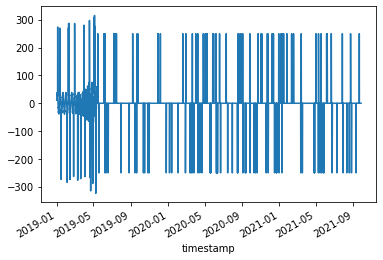

In [74]:
dfs['feat_0']['machine_0'].plot()

<AxesSubplot:xlabel='timestamp'>

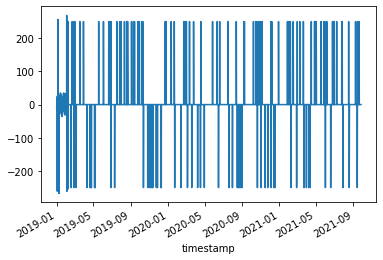

In [75]:
dfs['feat_2']['machine_3'].plot()

<AxesSubplot:xlabel='timestamp'>

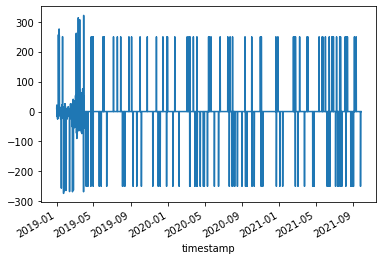

In [76]:
dfs['feat_3']['machine_11'].plot()

<font size="4"> It seems like the communication errors correspond to sensor data over 150 or under -150. To correct for this, let's recreate our DataFrame, map all of these values to NaN, and use time interpolation to fill the values: </font>

In [77]:
dfs = {}
#The following code maps data from each sensor to a pandas DataFrame and adds it to a dictionary.
for i in range(0,len(names)-1):
    temp_df = pd.read_sql_table(names[i],con=engine) #Read SQL table into pandas array
    temp_df.loc[np.abs(temp_df['value']) > 150,['value']] = np.nan #Preprocess 
    temp_df = temp_df.pivot(index = 'timestamp', columns = 'machine', values = 'value').interpolate(method='time',limit_direction='both')
    dfs[names[i]] = temp_df[natsorted(list(temp_df.columns.values))]

In [78]:
dfs['feat_0'].describe()

machine,machine_0,machine_1,machine_2,machine_3,machine_4,machine_5,machine_6,machine_7,machine_8,machine_9,machine_10,machine_11,machine_12,machine_13,machine_14,machine_15,machine_16,machine_17,machine_18,machine_19
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.023884,0.071590,-0.064165,0.007772,-0.143327,0.062368,0.037635,0.123741,0.115235,-0.020778,0.074507,0.069229,0.028317,-0.021377,0.091450,0.108000,0.169521,-0.078851,0.118252,0.086788
std,10.741261,19.360928,19.940065,4.723744,5.897714,10.984409,13.031727,18.273063,13.192519,12.671099,6.477232,9.091712,11.984154,12.380878,11.292717,19.442545,13.298727,12.096815,11.229502,5.362030
min,-68.224301,-74.868627,-77.944232,-39.242077,-74.071884,-73.912323,-75.624878,-77.141126,-39.247190,-66.135371,-39.234633,-71.391119,-69.543032,-75.637303,-75.337296,-78.369802,-75.633756,-66.672802,-73.942057,-70.602448
25%,-0.008005,-6.496713,-10.598657,-0.007043,-0.006716,-0.007892,-0.009074,-0.021943,-0.010088,-0.009413,-0.006957,-0.007645,-0.008789,-0.008670,-0.007821,-7.406434,-0.008834,-0.009804,-0.007470,-0.006950
50%,-0.000238,0.000824,-0.000194,-0.000125,0.000090,0.000359,-0.000241,-0.000347,0.000361,-0.000096,0.000239,0.000295,0.000083,0.000176,-0.000032,-0.000072,-0.000171,-0.000447,0.000489,0.000451
75%,0.007124,6.996771,10.389190,0.006921,0.006858,0.008109,0.008746,0.027825,0.011014,0.009902,0.007742,0.007950,0.009296,0.008697,0.008040,8.060002,0.008746,0.008564,0.008106,0.006870
max,75.535396,76.186253,71.978109,38.891367,77.609123,75.539861,80.057881,78.065946,39.240454,69.078712,38.929027,75.757981,70.243302,76.198484,75.532544,70.782406,80.045522,63.137777,75.547548,77.629779


<font size = '4'> Now, we see that the min and max are much more reasonable, and we also see that they are not above 81 in magnitude, which signifies to us that we did not cut off any legitimate data with our removal of values. We can also see various statistical moments for each machine. The mean is around 0, which is expected given the oscillatory nature of the data, and the standard deviation varies widely for each machine. </font>

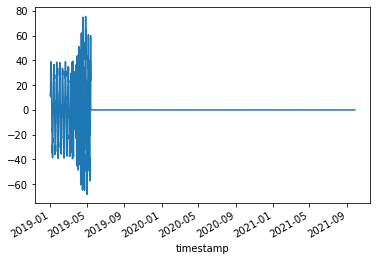

In [79]:
dfs['feat_0']['machine_0'].plot()
plt.show()

<font size = "4"> Our data looks much better now, and with the interpolation we have retained all of the timestamps. We can plot all of the sensor data for a single machine: </font>

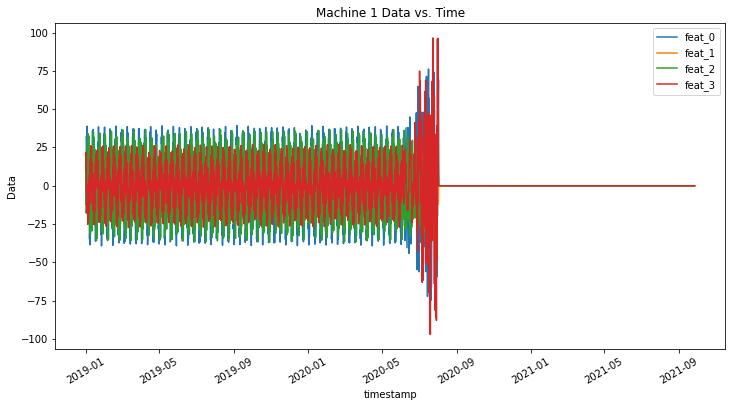

In [80]:
machine_num = 1 #Machine to plot, values in (0,19)

fig, ax = plt.subplots()
fig.set_size_inches(12,6)
for i in range(len(names)-1):
    ax.plot(dfs[names[i]]['machine_' + str(machine_num)])

plt.xticks(rotation = 30)
plt.xlabel("timestamp")
plt.ylabel("Data")
plt.title("Machine " + str(machine_num) + " Data vs. Time")
ax.legend(['feat_0', 'feat_1', 'feat_2', 'feat_3'])
plt.show()


<font size = "4"> Displayed above is the data for machine 1's sensors vs. time. As a sanity check, we see that all sensors fail at the same time. We can find the time of failure: </font>

In [81]:
arr = dfs['feat_0'].to_numpy() #Convert to numpy
failure = {} #dictionary of failures, where failure[machine_name] is a Timestamp object containing the time of failure
for i in range(arr.shape[1]):
    found = False
    j = 0
    while not found and j < arr.shape[0]-1:
        #If two consecutive data points are less than 0.05 in absolute value, declare failure at the time of the 
        #first point. The tolerance of 0.05 can be adjusted.
        if np.abs(arr[j][i]) < 0.05 and np.abs(arr[j+1][i]) < 0.05: 
            time = dfs['feat_0'].iloc[j].name
            failure['machine_' + str(i)] = time
            found = True            
        j+= 1

In [82]:
failure['machine_0']

Timestamp('2019-05-13 09:03:32.470823')

<font size = '4'> We can look at the weeks before and after a failure with the plot below: </font>

[]

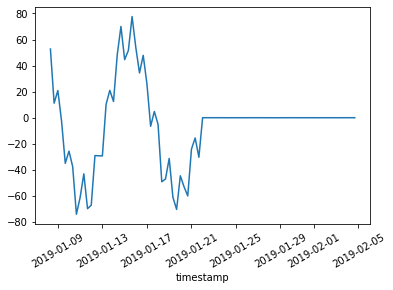

In [83]:
machine_num = 4
plt.plot(dfs['feat_0']['machine_' + str(machine_num)][failure['machine_' + str(machine_num)] - pd.Timedelta(weeks=2):failure['machine_' + str(machine_num)] + pd.Timedelta(weeks=2)])
plt.xlabel("timestamp")
plt.xticks(rotation = 30)
plt.plot()

In [84]:
inspector = inspect(engine)

<font size = '4'> It might be useful for troubleshooting to look at the model and room of each machine. This data is displayed below: </font>

In [85]:
static_data = pd.read_sql_table('static_data',con=engine,columns=['machine_id','model','room'])
static_data

,machine_id,model,room
0,machine_0,Model A,Room 123
1,machine_1,Model A,Room 123
2,machine_2,Model A,Room 123
3,machine_3,Model A,Room 123
4,machine_4,Model A,Room 123
5,machine_5,Model A,Room 123
6,machine_6,Model A,Room 123
7,machine_7,Model A,Room 123
8,machine_8,Model A,Room 123
9,machine_9,Model A,Room 123


<font size = '4'> In the table above, we can see the machines' corresponding model and room. </font>